<a href="https://colab.research.google.com/github/bhalleaheesha/Data-Analyst-Projects/blob/main/Banking_Loan_Approval_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "/content/Banking_Loan_Approval_Dataset_Enhanced.csv"
df = pd.read_csv(file_path)

df.head()

,Application_ID,Applicant_Name,Loan_Amount_USD,Annual_Income_USD,Credit_Score,Approval_Status,Loan_to_Income_Ratio,Credit_Score_Category,Loan_Size_Category,Income_Level
0,1,Brian Marshall,76634,64228,316,Rejected,1.193156,Poor,Large,Middle
1,2,Kevin Pineda,19879,45196,829,Approved,0.439840,Excellent,Small,Middle
2,3,Joseph Noble,14300,37382,558,Rejected,0.382537,Poor,Small,Low
3,4,Holly Gallagher,72070,102888,675,Rejected,0.700470,Good,Large,High
4,5,Brian Castro,65182,57651,666,Approved,1.130631,Fair,Large,Middle


In [4]:
df.shape

(100, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Application_ID         100 non-null    int64  
 1   Applicant_Name         100 non-null    object 
 2   Loan_Amount_USD        100 non-null    int64  
 3   Annual_Income_USD      100 non-null    int64  
 4   Credit_Score           100 non-null    int64  
 5   Approval_Status        100 non-null    object 
 6   Loan_to_Income_Ratio   100 non-null    float64
 7   Credit_Score_Category  100 non-null    object 
 8   Loan_Size_Category     100 non-null    object 
 9   Income_Level           100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


In [6]:
df.describe()

,Application_ID,Loan_Amount_USD,Annual_Income_USD,Credit_Score,Loan_to_Income_Ratio
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,53373.420000,81985.660000,563.120000,0.833581
std,29.011492,28266.525642,36967.770938,162.564938,0.687208
min,1.000000,1532.000000,23586.000000,303.000000,0.016355
25%,25.750000,31774.250000,50877.250000,408.000000,0.377717
50%,50.500000,53064.500000,75080.500000,577.500000,0.654296
75%,75.250000,78743.000000,115983.500000,695.500000,1.085252
max,100.000000,97451.000000,148298.000000,849.000000,3.333249


In [7]:
df.isnull().sum()

,0
Application_ID,0
Applicant_Name,0
Loan_Amount_USD,0
Annual_Income_USD,0
Credit_Score,0
Approval_Status,0
Loan_to_Income_Ratio,0
Credit_Score_Category,0
Loan_Size_Category,0
Income_Level,0


In [13]:
print(df.columns)

Index(['Application_ID', 'Applicant_Name', 'Loan_Amount_USD',
       'Annual_Income_USD', 'Credit_Score', 'Approval_Status',
       'Loan_to_Income_Ratio', 'Credit_Score_Category', 'Loan_Size_Category',
       'Income_Level'],
      dtype='object')


In [10]:
# Numerical columns – fill with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns – fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

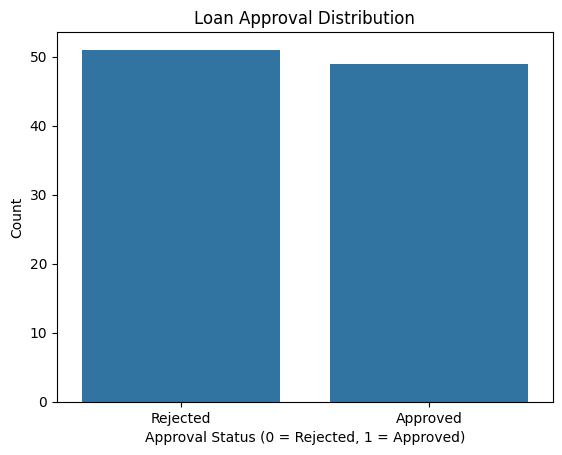

In [14]:
sns.countplot(x='Approval_Status', data=df)
plt.title("Loan Approval Distribution")
plt.xlabel("Approval Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()

# Approval Status: 0-> Rejected, 1-> Approved

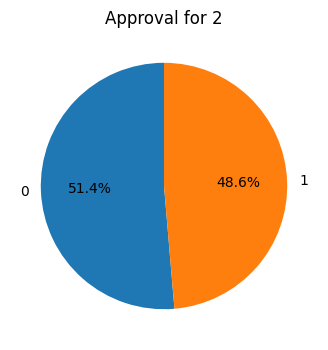

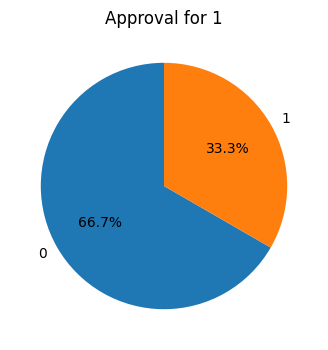

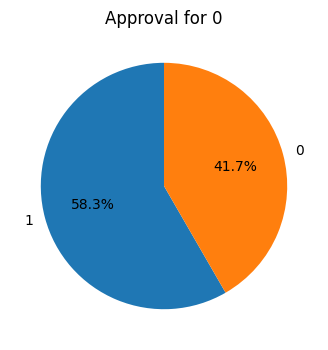

In [100]:
for level in df['Income_Level'].unique():
    subset = df[df['Income_Level'] == level]
    subset['Approval_Status'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', startangle=90, figsize=(4,4), title=f"Approval for {level}"
    )
    plt.ylabel("")
    plt.show()

# Total 3 pie chart Approval for 2[High Income Level], Approval for 1[Middle Income Level] and for Approval for 0[low Income Level]
# Approval Status: 0-> Rejected, 1-> Approved
# Income Level: 0->Low, 1->Middle, 2-> High

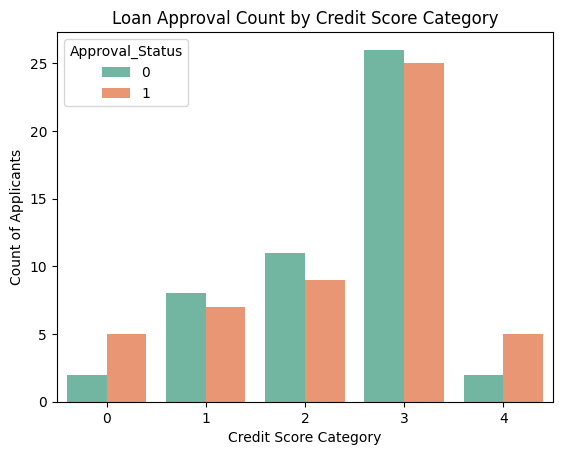

In [88]:
sns.countplot(x='Credit_Score_Category', hue='Approval_Status', data=df, palette='Set2')
plt.title("Loan Approval Count by Credit Score Category")
plt.xlabel("Credit Score Category")
plt.ylabel("Count of Applicants")
plt.show()

# Approval Status: 0-> Rejected, 1-> Approved
# credit card Credit_Score_Category: poor-> 0, fair-> 1, good-> 2, very good-> 3, excellent  -> 4

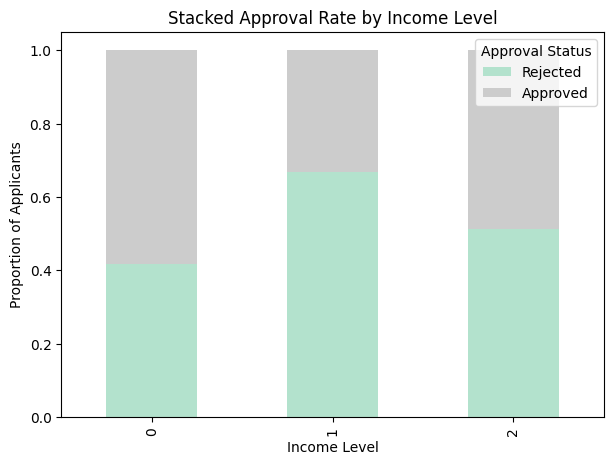

In [103]:
#Loan Approval by Income Level
aapproval_pct = df.groupby('Income_Level')['Approval_Status'].value_counts(normalize=True).unstack()
approval_pct.plot(kind='bar', stacked=True, colormap='Pastel2', figsize=(7,5))
plt.title("Stacked Approval Rate by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Proportion of Applicants")
plt.legend(title='Approval Status', labels=['Rejected','Approved'])
plt.show()

# Income Level: 0->Low, 1->Middle, 2-> High

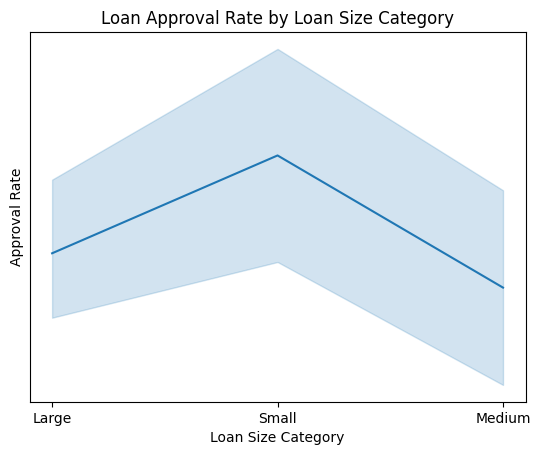

In [22]:
sns.lineplot(
    x='Loan_Size_Category',
    y='Approval_Status',
    data=df
)
plt.title("Loan Approval Rate by Loan Size Category")
plt.ylabel("Approval Rate")
plt.xlabel("Loan Size Category")
plt.show()

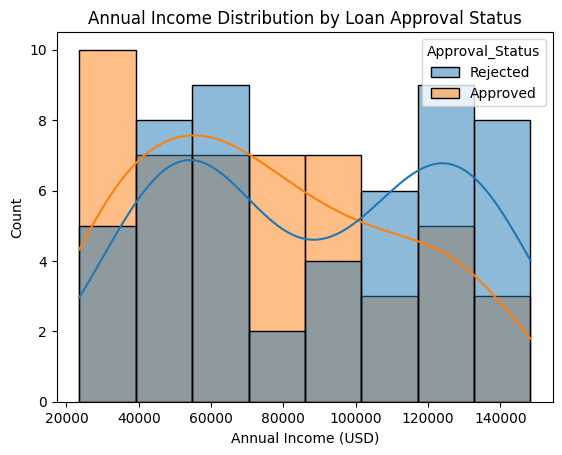

In [20]:
sns.histplot(
    data=df,
    x='Annual_Income_USD',
    hue='Approval_Status',
    kde=True
)
plt.title("Annual Income Distribution by Loan Approval Status")
plt.xlabel("Annual Income (USD)")
plt.show()

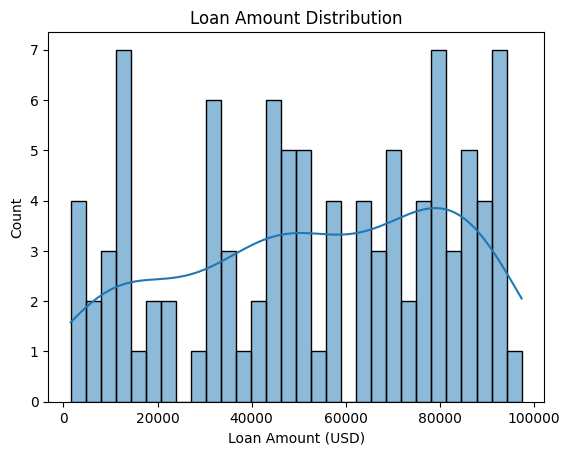

In [24]:
sns.histplot(
    data=df,
    x='Loan_Amount_USD',
    bins=30,
    kde=True
)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount (USD)")
plt.show()

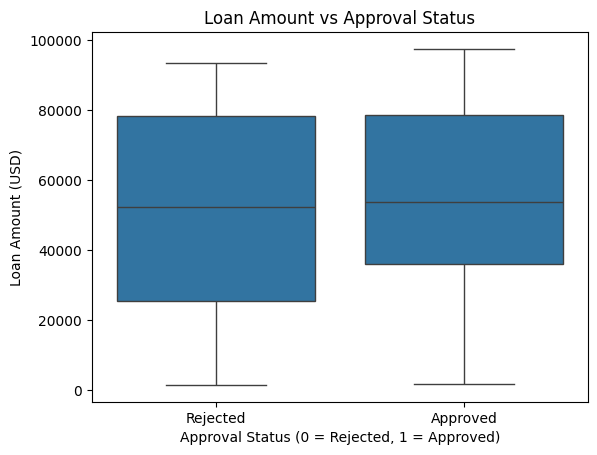

In [29]:
sns.boxplot(
    x='Approval_Status',
    y='Loan_Amount_USD',
    data=df
)
plt.title("Loan Amount vs Approval Status")
plt.xlabel("Approval Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Loan Amount (USD)")
plt.show()

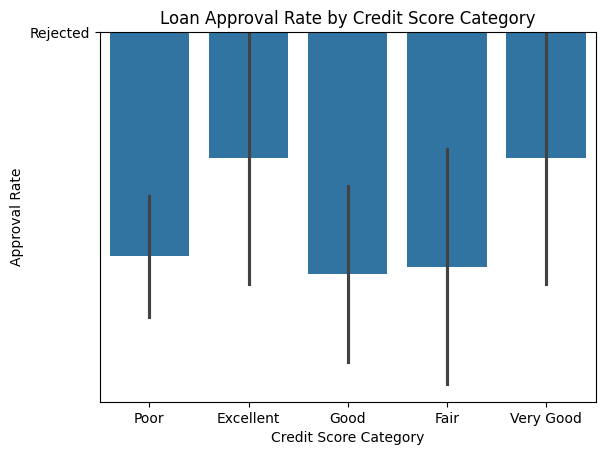

In [30]:
sns.barplot(
    x='Credit_Score_Category',
    y='Approval_Status',
    data=df
)
plt.title("Loan Approval Rate by Credit Score Category")
plt.ylabel("Approval Rate")
plt.xlabel("Credit Score Category")
plt.show()

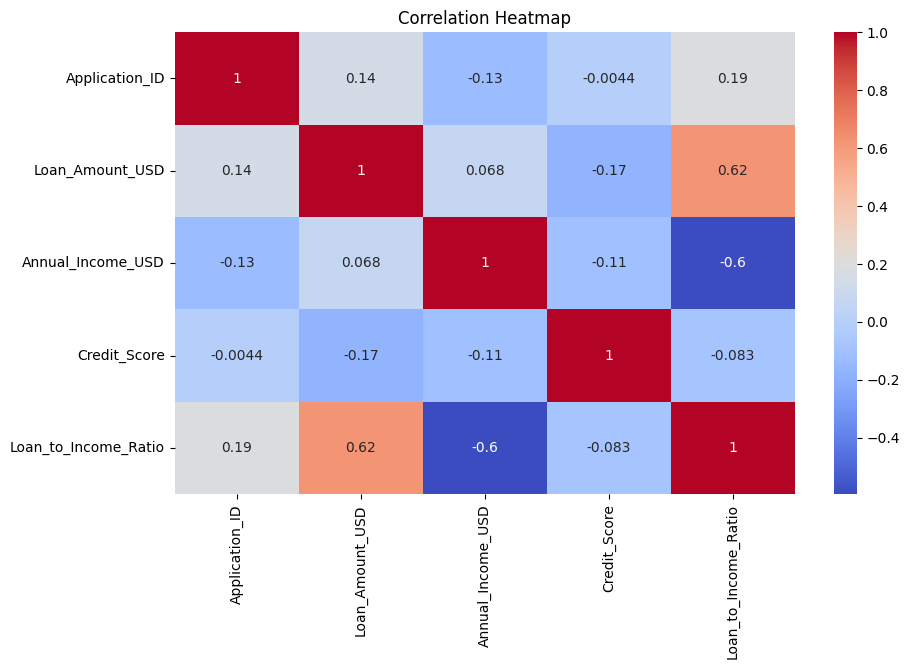

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Key Business KPIs (Tables)**

In [40]:
approval_rate = df['Approval_Status'].mean()
print("Overall Loan Approval Rate:", round(approval_rate * 100, 2), "%")

Overall Loan Approval Rate: 51.0 %


In [41]:
approval_by_income = (
    df.groupby('Income_Level')['Approval_Status']
      .mean()
      .round(2)
)

print(approval_by_income)

Income_Level
0    0.58
1    0.33
2    0.49
Name: Approval_Status, dtype: float64


In [42]:
#Approval rate by Loan Size Category
df.groupby('Loan_Size_Category')['Approval_Status'].mean()

,Approval_Status
Loan_Size_Category,
0,0.490909
1,0.423077
2,0.684211


In [43]:
#Approval rate by Credit Score Category
df.groupby('Credit_Score_Category')['Approval_Status'].mean()

,Approval_Status
Credit_Score_Category,
0,0.714286
1,0.466667
2,0.450000
3,0.490196
4,0.714286


In [44]:
#Approval rate by Income Level
df.groupby('Income_Level')['Approval_Status'].mean()

,Approval_Status
Income_Level,
0,0.583333
1,0.333333
2,0.486486


**Simple Predictive Model [Analyst Level]**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
#Encoding Categorical Columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd

# --- 1. Define target and features ---
TARGET = 'Approval_Status'

# Drop target from features
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# --- 2. Drop non-informative columns ---
X = X.drop(['Application_ID', 'Applicant_Name'], axis=1)

# --- 3. Encode categorical variables ---
X = pd.get_dummies(X, drop_first=True)

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 5. Print shapes to confirm ---
print("Shapes after train-test split:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

# --- 6. Show first few rows of processed features ---
print("\nFirst 5 rows of X_train after preprocessing:")
print(X_train.head())

Shapes after train-test split:
X_train: (80, 7)
X_test : (20, 7)
y_train: (80,)
y_test : (20,)

First 5 rows of X_train after preprocessing:
    Loan_Amount_USD  Annual_Income_USD  Credit_Score  Loan_to_Income_Ratio  \
55            88777             148298           303              0.598639   
88            45725              82669           413              0.553109   
26            42974              77628           542              0.553589   
42            33174             137852           345              0.240649   
69            83184              49624           410              1.676286   

    Credit_Score_Category  Loan_Size_Category  Income_Level  
55                      3                   0             0  
88                      3                   1             0  
26                      3                   1             2  
42                      3                   1             0  
69                      3                   0             2  


**Model Training**

In [49]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define target
TARGET = 'Approval_Status'

# Features
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# Drop non-informative columns
X = X.drop(['Application_ID', 'Applicant_Name'], axis=1)

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#below code is the output above code to check it is worked or not
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test  shape:", y_test.shape)

X_train shape: (80, 7)
X_test  shape: (20, 7)
y_train shape: (80,)
y_test  shape: (20,)


In [48]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print confirmation
print("Model trained successfully!")

Model trained successfully!


**Evaluation**

In [64]:
# --- 1️. Import Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 2️. Define Target and Features ---
TARGET = 'Approval_Status'

# Features & target
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# Drop non-informative columns
X = X.drop(['Application_ID', 'Applicant_Name'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# --- 3️. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes
print("Shapes after train-test split:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

# Show first few rows of X_train
print("\nFirst 5 rows of X_train after preprocessing:")
print(X_train.head())

# --- 4️. Train Logistic Regression Model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("\nModel trained successfully!")

# --- 5️. Make Predictions ---
y_pred = model.predict(X_test)

# --- 6️. Evaluate Model ---
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy*100, 2), "%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Shapes after train-test split:
X_train: (80, 7)
X_test : (20, 7)
y_train: (80,)
y_test : (20,)

First 5 rows of X_train after preprocessing:
    Loan_Amount_USD  Annual_Income_USD  Credit_Score  Loan_to_Income_Ratio  \
55            88777             148298           303              0.598639   
88            45725              82669           413              0.553109   
26            42974              77628           542              0.553589   
42            33174             137852           345              0.240649   
69            83184              49624           410              1.676286   

    Credit_Score_Category  Loan_Size_Category  Income_Level  
55                      3                   0             0  
88                      3                   1             0  
26                      3                   1             2  
42                      3                   1             0  
69                      3                   0             2  

Model trained suc

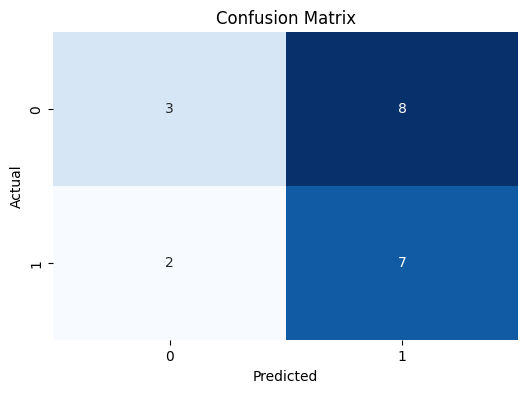

In [52]:
#Confusion Matrix Heatmap

#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

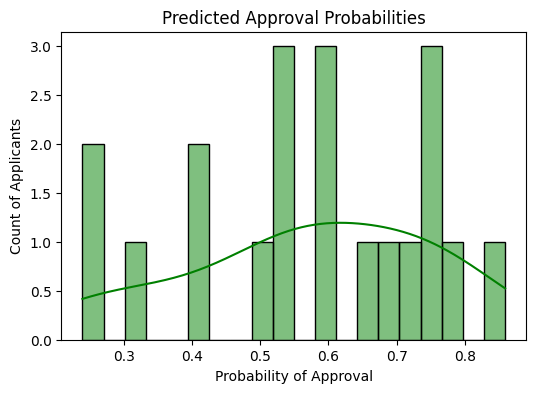

In [57]:
#Predicted Probabilities Distribution
import matplotlib.pyplot as plt
import seaborn as sns

y_prob = model.predict_proba(X_test)[:,1]  # Probability of Approval (class=1)

plt.figure(figsize=(6,4))
sns.histplot(y_prob, bins=20, kde=True, color='green')
plt.title("Predicted Approval Probabilities")
plt.xlabel("Probability of Approval")
plt.ylabel("Count of Applicants")
plt.show()

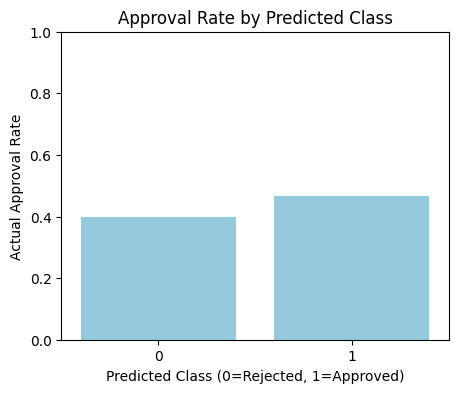

In [59]:
#Approval Rates by Predicted Class
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

approval_by_class = pd.DataFrame({
    'Predicted_Class': y_pred,
    'Actual_Approval': y_test
})

approval_rate = approval_rate.reset_index()  # Reset index to make it a column

plt.figure(figsize=(5,4))
sns.barplot(x='Predicted_Class', y='Actual_Approval', data=approval_rate, color='skyblue')
plt.title("Approval Rate by Predicted Class")
plt.xlabel("Predicted Class (0=Rejected, 1=Approved)")
plt.ylabel("Actual Approval Rate")
plt.ylim(0,1)
plt.show()

In [63]:
# Preprocessing & Train-Test Split
X = df.drop('Approval_Status', axis=1)
y = df['Approval_Status']
X = X.drop(['Application_ID', 'Applicant_Name'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Check the first 5 predictions
print("First 5 predictions:", y_pred[:5])

# Check accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy*100,2), "%")

#To display a confusion matrix or classification report:
from sklearn.metrics import confusion_matrix, classification_report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

First 5 predictions: [1 1 1 1 0]
Model Accuracy: 50.0 %

Confusion Matrix:
 [[3 8]
 [2 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.27      0.38        11
           1       0.47      0.78      0.58         9

    accuracy                           0.50        20
   macro avg       0.53      0.53      0.48        20
weighted avg       0.54      0.50      0.47        20



In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3, 8],
       [2, 7]])